In [1]:
import sys
sys.path.append('../../')

import jax
import jax.numpy as jnp
import numpy as np
import os
import random

from tools.generate import read_photon_data_from_photonsim, generate_events_from_photonsim
from tools.simulation import setup_event_simulator
from tools.geometry import generate_detector
from tools.visualization import create_detector_display, create_detector_comparison_display

json_filename = '../../config/IWCD_geom_config.json'

detector = generate_detector(json_filename)
Nphot = 10_000_000

simulate_event = setup_event_simulator(json_filename, Nphot, K=10, is_data=False, is_calibration=True, temperature=0., max_detectors_per_cell=4)

In [2]:
detector_params = (
    jnp.array(500),          # scatter_length
    jnp.array(0.5),          # reflection_rate
    jnp.array(100000.),      # absorption_length
    jnp.array(0.01)           # gumbel_softmax_temp
)

In [3]:
from tools.utils import generate_random_point_inside_cylinder

# Generate and save a single event
key_id = 149790003
key = jax.random.PRNGKey(key_id)

# Sample true parameter configurations:
source_origin = np.array([2.,0.5,2.3])#generate_random_point_inside_cylinder(key, r=4, h=4)#jnp.array([30.,0.,0.])#
source_intensity = 1

source_params = (source_origin, source_intensity)

In [4]:
detector = generate_detector(json_filename)
detector_points = jnp.array(detector.all_points)
detector_radius = detector.S_radius
NUM_DETECTORS = len(detector_points)

single_event_data = jax.lax.stop_gradient(simulate_event(source_params, detector_params, key))
print(f"source_origin: {source_origin}")
print(f"source_intensity: {source_intensity}")
#print_detector_params(detector_params)

source_origin: [2.  0.5 2.3]
source_intensity: 1


In [5]:
from tools.utils import load_single_event, save_single_event

save_single_event(single_event_data, source_params, detector_params, filename='../../events/test_event_data.h5', calibration_mode=True)
event_location = '../../events/test_event_data.h5'
loaded_source_params, loaded_detector_params, loaded_indices, loaded_charges, loaded_times= load_single_event(event_location, NUM_DETECTORS, calibration_mode=True)

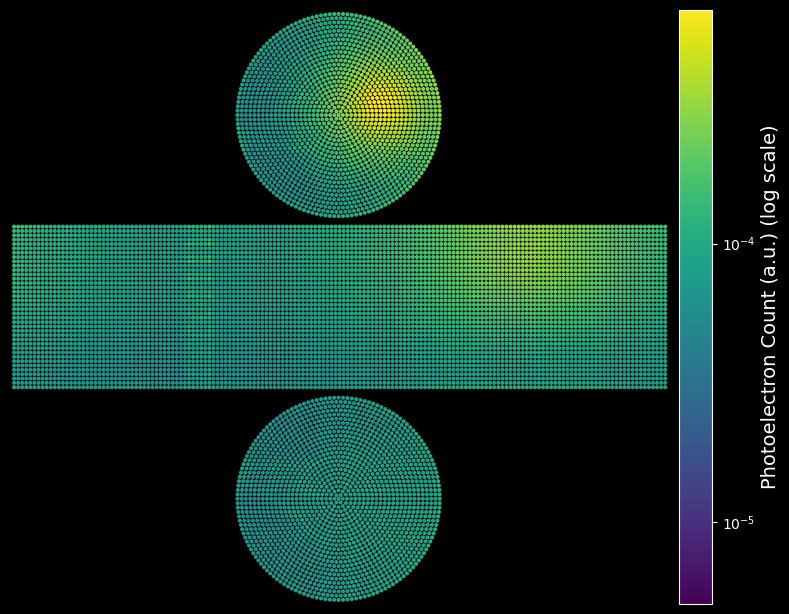

In [6]:
from tools.visualization import create_detector_display
detector_display = create_detector_display(json_filename)
detector_display(loaded_indices, loaded_charges, loaded_times, file_name=None, plot_time=False, log_scale=True)

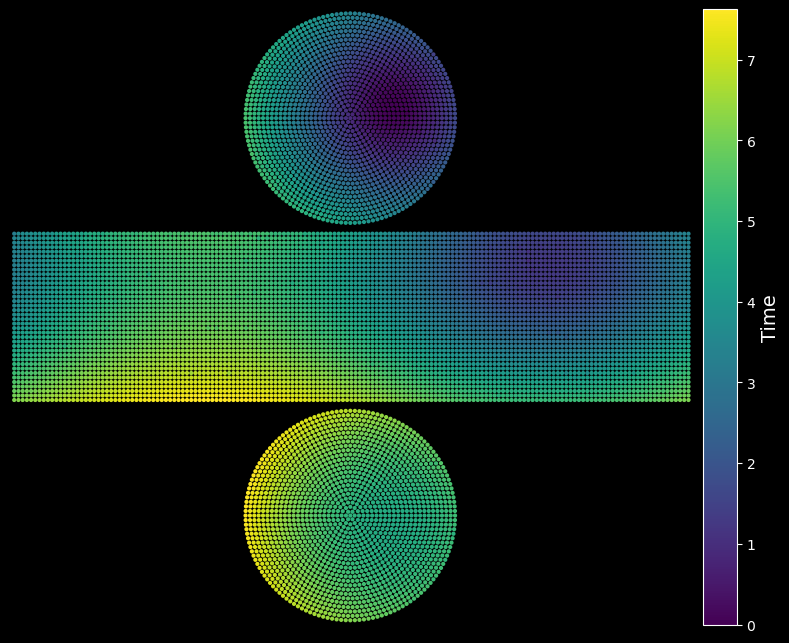

In [7]:
detector_display(loaded_indices, loaded_charges, loaded_times, file_name=None, plot_time=True, log_scale=False)

In [8]:
np.sum(loaded_times==0)

Array(1, dtype=int32)

In [9]:
new_times = jnp.array([1., 2., 3., jnp.nan])

In [10]:
jnp.isnan(new_times)

Array([False, False, False,  True], dtype=bool)